In [2]:
import glob
import os.path
import numpy as np
import pandas as pd
import tifffile
import matplotlib.pyplot as plt
from scipy.io import loadmat
import datetime
import sqlite3
import json

In [3]:
def read_json_metadata(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
        
    time = []
    integration = []
    wavelength = []
    intensity = []
    for d in data:
        dt = datetime.datetime(*[int(t) for t in d['AbsTime']])
        unix_timestamp = int(dt.timestamp())
        tau = float(d['ExpTime'])
        lam = int(d['Wavelength'])
        intense = float(d['AvgInt'])
        time.append(unix_timestamp)
        integration.append(tau)
        wavelength.append(lam)
        intensity.append(intense)
        
    indices = np.argsort(wavelength)
    return (np.asarray(time)[indices], 
            np.asarray(integration)[indices], 
            np.asarray(wavelength)[indices], 
            np.asarray(intensity)[indices],
            indices)

In [4]:
filepath = r'D:\Jesse\phatnoms_02172025\milk\cycle1\milk_c1__metadata.json'
metadata = read_json_metadata(filepath)
print(metadata)

(array([1739813941, 1739813943, 1739813945, 1739813946, 1739813948,
       1739813949, 1739813951, 1739813953, 1739813954, 1739813956,
       1739813958, 1739813959, 1739813961, 1739813962, 1739813964,
       1739813966, 1739813967, 1739813969, 1739813971, 1739813972,
       1739813974, 1739813975, 1739813977, 1739813979, 1739813980,
       1739813982, 1739813984, 1739813985, 1739813987, 1739813989,
       1739813990, 1739813992, 1739813993]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720]), array([ 130.54550672,  131.26106501,  144.53297806,  194.55180478,
        415.10384536,  446.42226219,  370.82273769,  290.56231403,
        243.45020461,  385.05382657,  648.50362349,  939.15254688,
       1285.217

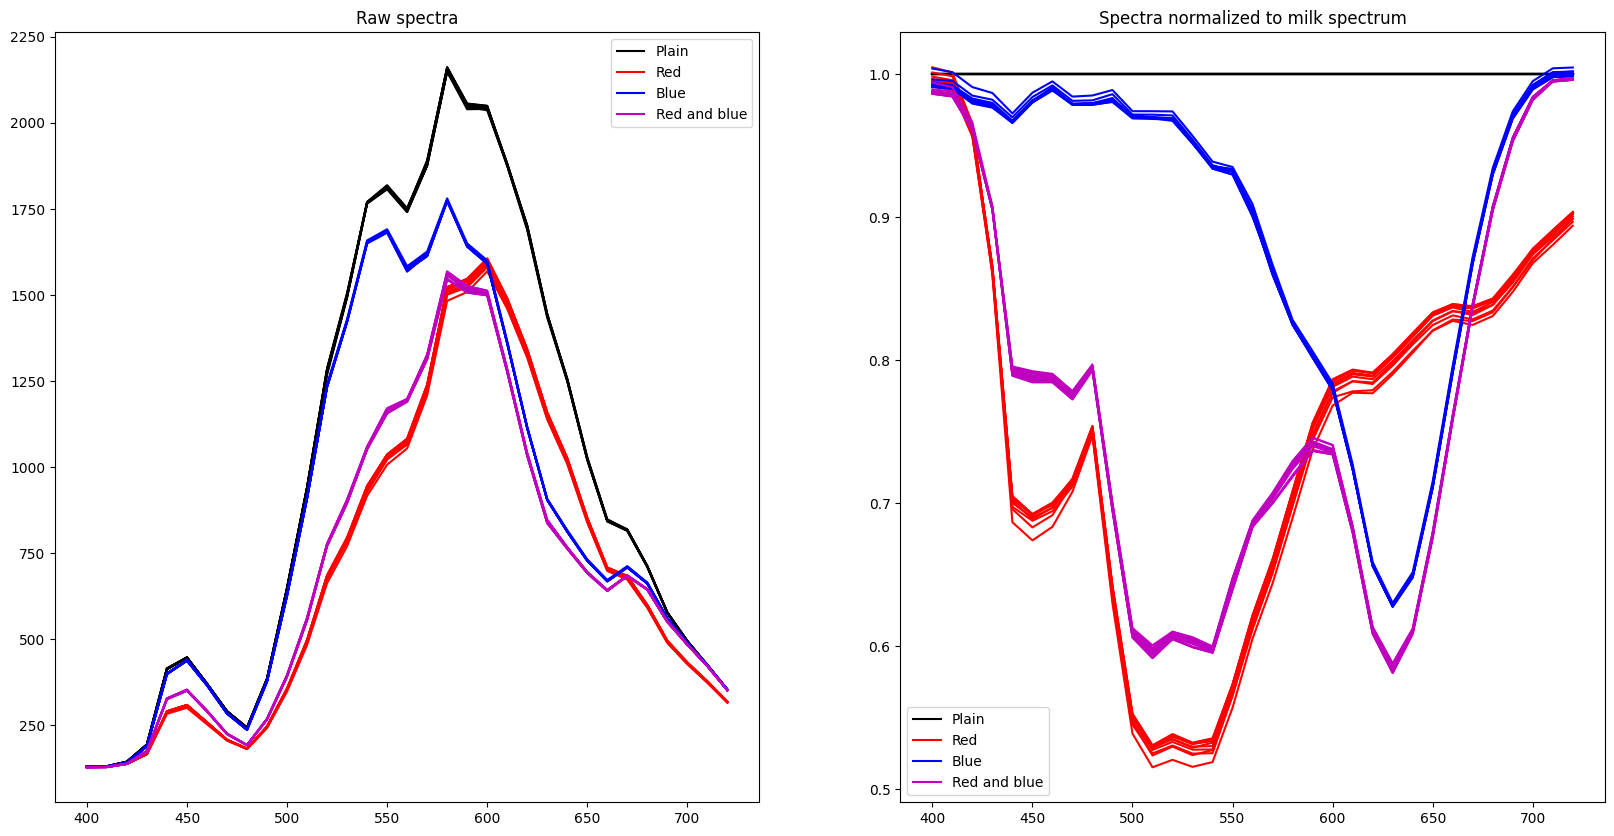

In [5]:
milk_paths = {'Plain': [r'D:\Jesse\phatnoms_02172025\milk', 'k'],
              'Red': [r'D:\Jesse\phatnoms_02172025\red_milk', 'r'],
              'Blue': [r'D:\Jesse\phatnoms_02172025\blue_milk', 'b'],
              'Red and blue': [r'D:\Jesse\phatnoms_02172025\purple_milk', 'm'] }

fig = plt.figure(figsize = (20,10))
raw_ax = plt.subplot(121)
diff_ax = plt.subplot(122)
out_data = {}
for label, (path, c) in milk_paths.items():
    raw_ax.plot([], [], label=label, color=c)
    diff_ax.plot([], [], label=label, color=c)
    for cycle in os.listdir(path):
        # Load settings data
        metadata_file = glob.glob(os.path.join(path, cycle, '*metadata.json'))[0]
        tim, integration, wavelength, intensity, indices = read_json_metadata(metadata_file)
        out_data[label] = intensity
        raw_ax.plot(wavelength, intensity, color=c)
        diff_ax.plot(wavelength, intensity / out_data['Plain'], color=c)
raw_ax.legend()
raw_ax.set_title('Raw spectra')
diff_ax.legend()
diff_ax.set_title('Spectra normalized to milk spectrum')
plt.show()